<div align="center"><b>Text Mining Assingment</b></div>

In [ ]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
import gensim
from gensim import corpora, models
import pyLDAvis
import pyLDAvis.gensim_models
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

/home/hexuser/.cache/pypoetry/virtualenvs/python-kernel-OtKFaj5M-py3.10/lib/python3.10/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  from imp import reload


<div align="center"><b>1. (10 pts) Preprocess the text data in each of the "review/summary" and "review/text" columns. Preprocessing should include tokenization, lowercasing, stop word removal, stemming and any other necessary steps. Describe each of the above steps in the Word Document.</b></div>


In [ ]:
# read book_ratings.csv
dfRL = pd.read_csv('book_ratings.csv')
dfRL.head()

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,1593351348,Wuthering Heights,18.96,AKZ3R4NWFK6ON,"E. Gray ""musiq lovr""",0.142857,5,1260230400,Got this,Got this book version along with Romeo & Julie...
1,1578849209,Natural Atheism,14.04,A384SQPY12385,David B. Pearson,0.950000,5,1135123200,Outstanding Freethought,"Although I've pretty much always been a ""natur..."
2,0613659155,Nights In Rodanthe (Turtleback School & Librar...,19.57,A2GAP7XWBZU8QI,Eric,NaN,4,1065744000,A Decent Novel,The first book I read by Mr. Sparks was 'A Wal...
3,1590594991,Pro Apache Log4j,43.94,A2IAL7V5B0M2LZ,"Wayne Cannon ""Wayne""",1.000000,4,1174176000,Almost identical with excellent on-line material,"This is an excellent reference. However, be aw..."
4,0201328186,"Yellow Fever, Black Goddess: The Coevolution O...",15.27,A14UM7LOF20W6P,Frank,0.666667,3,907200000,Stilted prose,"While the subject of the book is fascinating, ..."


In [ ]:
dfRL.isnull().sum()
dfRL = dfRL.dropna()
dfRL.isnull().sum()

Id                    0
Title                 0
Price                 0
User_id               0
profileName           0
review/helpfulness    0
review/score          0
review/time           0
review/summary        0
review/text           0
dtype: int64

In [ ]:
# Create the dim() function for review/summary to show number of terms/features.
def dimRLS():
    dimensions = len(set(dfRL["review/summary"].str.split().explode().values))
    print(f'{dimensions} dimensions in the DFM.')
dimRLS()

1874 dimensions in the DFM.


In [ ]:
# Create the dim() function for review/test to show number of terms/features.
def dimRLT():
    dimensions = len(set(dfRL["review/text"].str.split().explode().values))
    print(f'{dimensions} dimensions in the DFM.')
dimRLT()

21216 dimensions in the DFM.


In [ ]:
# pre-processing for review/summary

# Remove Punucations from review/summary
dfRL["review/summary"] = dfRL["review/summary"].str.replace(r'[^\w\s]+', '', regex=True)
regex = True

# convert all words to lowercase in review/summary
dfRL["review/summary"] = dfRL["review/summary"].str.lower()

# remove extra spaces
dfRL["review/summary"] = dfRL["review/summary"].str.replace(r'\s+', ' ', regex=True).str.strip()

# remove all stopwords from review/summary
nltk.download("stopwords")
stopRLS = stopwords.words("english")
dfRL['review/summary'] = dfRL['review/summary'].apply(lambda x: " ".join(x for x in x.split()
                                                         if x not in stopRLS))

# stem for review/summary
stRLS = PorterStemmer()
dfRL['review/summary'] = dfRL['review/summary'].apply(lambda x: " ".join([stRLS.stem(word)
                                                         for word in x.split()]))

# further remove words that you dont really need
stopRLS2 = stopRLS.copy()
stopRLS2 += ["book"]
dfRL['review/summary'] = dfRL['review/summary'].apply(lambda x: " ".join(x for x in x.split()
                                                         if x not in stopRLS2))

dimRLS()

1210 dimensions in the DFM.
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/hexuser/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# pre-processing for review/text

# remove punucations from review/text
dfRL["review/text"] = dfRL["review/text"].str.replace(r'[^\w\s]+', '', regex=True)

# convert all words to lowercase in review/text
dfRL["review/text"] = dfRL["review/text"].str.lower()

# remove extra spaces
dfRL["review/text"] = dfRL["review/text"].str.replace(r'\s+', ' ', regex=True).str.strip()

# remove all stopwords from review/text
nltk.download("stopwords")
stopRLT = stopwords.words("english")
dfRL['review/text'] = dfRL['review/text'].apply(lambda x: " ".join(x for x in x.split()
                                                         if x not in stopRLT))

# stem for review/text
stRLT = PorterStemmer()
dfRL['review/text'] = dfRL['review/text'].apply(lambda x: " ".join([stRLT.stem(word)
                                                         for word in x.split()]))

# further remove words that you dont really need
stopRLT2 = stopRLT.copy()
stopRLT2 += ["book"]
dfRL['review/text'] = dfRL['review/text'].apply(lambda x: " ".join(x for x in x.split()
                                                         if x not in stopRLT2))

dimRLT()

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/hexuser/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
10251 dimensions in the DFM.


 <div align="center"><b>2. (7 pts) Create word clouds for each of the "review/summary" and "review/text" columns,
after preprocessing. Copy and paste the word clouds outputs in the Word document.
Write one-two sentences for what you can interpret from each of the two word clouds.</b></div>


/home/hexuser/.cache/pypoetry/virtualenvs/python-kernel-OtKFaj5M-py3.10/lib/python3.10/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)
/home/hexuser/.cache/pypoetry/virtualenvs/python-kernel-OtKFaj5M-py3.10/lib/python3.10/site-packages/wordcloud/wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/home/hexuser/.cache/pypoetry/virtualenvs/python-kernel-OtKFaj5M-py3.10/lib/python3.10/site-packages/wordcloud/wordcloud.py:512: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation

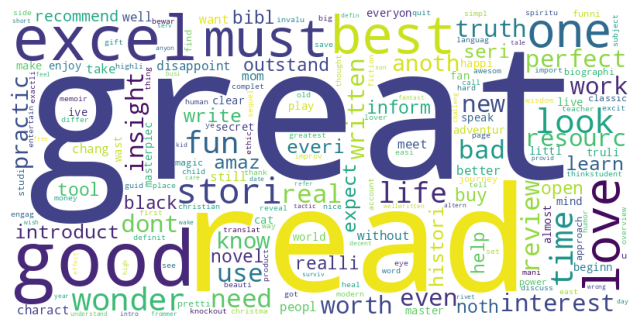

In [ ]:
# create word cloud for review/summary
comment_wordsRLS = ' '.join(dfRL['review/summary'].astype(str))
wordcloudRLS = WordCloud(width=800, height=400, background_color='white', collocations=False).generate(comment_wordsRLS)
plt.figure(figsize=(8,8))
plt.clf()
plt.imshow(wordcloudRLS)
plt.axis('off')
plt.show()

/home/hexuser/.cache/pypoetry/virtualenvs/python-kernel-OtKFaj5M-py3.10/lib/python3.10/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)
/home/hexuser/.cache/pypoetry/virtualenvs/python-kernel-OtKFaj5M-py3.10/lib/python3.10/site-packages/wordcloud/wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/home/hexuser/.cache/pypoetry/virtualenvs/python-kernel-OtKFaj5M-py3.10/lib/python3.10/site-packages/wordcloud/wordcloud.py:512: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation

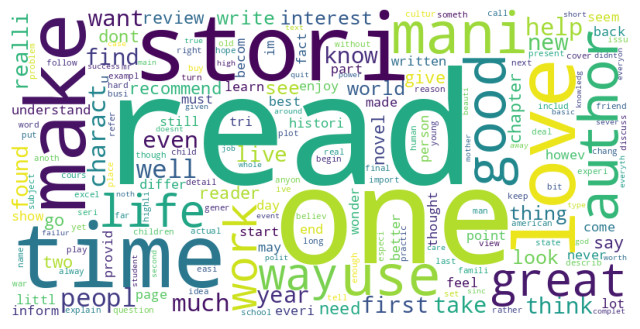

In [ ]:
# create word cloud for review/text
comment_wordsRLT = ' '.join(dfRL['review/text'].astype(str))
wordcloudRLT = WordCloud(width=800, height=400, background_color='white', collocations=False).generate(comment_wordsRLT)
plt.figure(figsize=(8,8))
plt.clf()
plt.imshow(wordcloudRLT)
plt.axis('off')
plt.show()

<div align="center"><b>3. (8 pts) Perform text mining for each of the "review/summary" and "review/text" columns
to estimate the similarity between documents. Show the similarity output tables for the
first 5 documents for the summary and text columns. Paste the appropriate screenshots
in the Word document.</b></div>


In [ ]:
# Tokenize the documents in the review/summary column
corpusRLS = [doc.split() for doc in dfRL["review/summary"]]

# Create the term dictionary of the corpus
dictionaryRLS = corpora.Dictionary(corpusRLS)

dictionaryRLS.filter_extremes(no_below = 1, no_above = .95)

# Convert the corpus into Document Term Matrix
DFMRLS = [dictionaryRLS.doc2bow(doc) for doc in corpusRLS]

print(DFMRLS)


[[(0, 1)], [(1, 1), (2, 1)], [(3, 1), (4, 1), (5, 1), (6, 1), (7, 1)], [(8, 1), (9, 1)], [(10, 1), (11, 1), (12, 1)], [(13, 1), (14, 1)], [(15, 1)], [(15, 1), (16, 1), (17, 1)], [(18, 1), (19, 1)], [(4, 1), (20, 1), (21, 1), (22, 1), (23, 1)], [(24, 1), (25, 1), (26, 1), (27, 1), (28, 1)], [(29, 1), (30, 1), (31, 1)], [(17, 1), (32, 1), (33, 1)], [(34, 1), (35, 1), (36, 1)], [(15, 1), (37, 1), (38, 1)], [(39, 1), (40, 1)], [(41, 1), (42, 1)], [(27, 2), (43, 1)], [(44, 1), (45, 1)], [(46, 1)], [(47, 1), (48, 1)], [(42, 1), (49, 1)], [(38, 1), (50, 1)], [(51, 1), (52, 1)], [(15, 1), (45, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1)], [(58, 1), (59, 1), (60, 1)], [(29, 1), (42, 1)], [(61, 1), (62, 1)], [(29, 1), (63, 1), (64, 1), (65, 1)], [(53, 1), (66, 1), (67, 1), (68, 1)], [(69, 1)], [(70, 1), (71, 1), (72, 1), (73, 1), (74, 1)], [(42, 1), (75, 1), (76, 1), (77, 1)], [(78, 1), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1)], [(4, 1), (84, 1), (85, 1), (86, 1)], [(65, 1), (87, 1), (88,

In [ ]:
# Compute similarity between documents in review/summary
from gensim.similarities import MatrixSimilarity
similRLS = MatrixSimilarity(DFMRLS, num_features=len(dictionaryRLS))

# convert simil to a data frame
text_simRLS = pd.DataFrame(similRLS[DFMRLS])
text_simRLS[0:5]

,0,1,2,3,4,5,6,7,8,9,...,705,706,707,708,709,710,711,712,713,714
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Tokenize the documents in the review/text column
corpusRLT = [doc.split() for doc in dfRL["review/text"]]

# Create the term dictionary of the corpus
dictionaryRLT = corpora.Dictionary(corpusRLT)

dictionaryRLT.filter_extremes(no_below = 2, no_above = 0.75)

# Convert the corpus into Document Term Matrix
DFMRLT = [dictionaryRLT.doc2bow(doc) for doc in corpusRLT]

print(DFMRLT)

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1)], [(5, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 2), (15, 1), (16, 2), (17, 1), (18, 1), (19, 1), (20, 1), (21, 2), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 2), (30, 1), (31, 1), (32, 1), (33, 1), (34, 2), (35, 1), (36, 3), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 3), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1)], [(34, 1), (61, 2), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 3), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1)], [(26, 1), (34, 2), (41, 1), (43, 1), (59, 1), (70, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 2), (87, 1), (88, 1), (89, 1), (90, 1), (91, 1), (92, 1), (93, 1), (94, 1), (95, 1), (96, 1), (97, 1), (98, 1), (99, 1), (100, 1), (101, 1), (102, 1), (

In [ ]:
# Compute similarity between documents in review/text
from gensim.similarities import MatrixSimilarity
similRLT = MatrixSimilarity(DFMRLT, num_features=len(dictionaryRLT))

# convert simil to a data frame
text_simRLT = pd.DataFrame(similRLT[DFMRLT])
text_simRLT[0:5]

,0,1,2,3,4,5,6,7,8,9,...,705,706,707,708,709,710,711,712,713,714
0,1.000000,0.034711,0.000000,0.000000,0.000000,0.000000,0.000000,0.059235,0.029881,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.045763,0.000000,0.000000
1,0.034711,1.000000,0.038215,0.087376,0.097871,0.179244,0.107150,0.164486,0.072602,0.077314,...,0.094501,0.062230,0.077348,0.025182,0.137205,0.050217,0.091835,0.111192,0.040765,0.023953
2,0.000000,0.038215,1.000000,0.051964,0.058206,0.000000,0.018881,0.032608,0.016449,0.030653,...,0.011529,0.000000,0.021647,0.039936,0.043519,0.026547,0.000000,0.012596,0.032325,0.113961
3,0.000000,0.087376,0.051964,1.000000,0.121993,0.081244,0.064756,0.111833,0.084620,0.008761,...,0.052718,0.056413,0.111363,0.000000,0.024876,0.045523,0.071358,0.136797,0.073910,0.000000
4,0.000000,0.097871,0.058206,0.121993,0.999999,0.151672,0.157158,0.156582,0.126379,0.107944,...,0.092267,0.147442,0.101640,0.051139,0.111456,0.144473,0.099911,0.112905,0.082787,0.012161


<div align="center"><b>4.  (10 pts) Perform topic modeling on “review/text” using LDA model and generate 6 topics.In the word document, show the topic model output for each of the 6 topics as the linear combination of the terms. For 2 of the topics, write a short description in 2-3 sentences for each topic.</b></div>

In [ ]:
# lda for review/text
n_topicsRLT = 8
ldamodelRLT = models.LdaModel(DFMRLT, num_topics=n_topicsRLT, id2word=dictionaryRLT, passes=40)
print(ldamodelRLT.print_topics(num_topics=n_topicsRLT, num_words=10))

[(0, '0.007*"one" + 0.007*"well" + 0.006*"letter" + 0.006*"psycholog" + 0.006*"amp" + 0.005*"time" + 0.005*"new" + 0.005*"read" + 0.005*"two" + 0.005*"love"'), (1, '0.011*"read" + 0.008*"mani" + 0.006*"use" + 0.006*"author" + 0.006*"one" + 0.006*"peopl" + 0.005*"time" + 0.005*"like" + 0.005*"get" + 0.004*"would"'), (2, '0.010*"life" + 0.009*"one" + 0.009*"read" + 0.008*"busi" + 0.007*"live" + 0.006*"love" + 0.006*"compani" + 0.006*"time" + 0.006*"peopl" + 0.005*"mr"'), (3, '0.016*"read" + 0.012*"like" + 0.011*"one" + 0.009*"love" + 0.007*"stori" + 0.006*"would" + 0.006*"get" + 0.006*"time" + 0.005*"good" + 0.005*"realli"'), (4, '0.008*"much" + 0.007*"make" + 0.007*"read" + 0.006*"one" + 0.006*"review" + 0.005*"look" + 0.005*"david" + 0.004*"written" + 0.004*"like" + 0.004*"time"'), (5, '0.009*"read" + 0.007*"get" + 0.007*"make" + 0.007*"work" + 0.006*"use" + 0.006*"chapter" + 0.005*"like" + 0.005*"way" + 0.005*"help" + 0.005*"would"'), (6, '0.013*"read" + 0.010*"one" + 0.008*"stori" + 

In [ ]:
# lda review/summary visualization 
pyLDAvis.enable_notebook()
visRLT = pyLDAvis.gensim_models.prepare(ldamodelRLT, DFMRLT, dictionaryRLT)
visRLT

/home/hexuser/.cache/pypoetry/virtualenvs/python-kernel-OtKFaj5M-py3.10/lib/python3.10/site-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  by='saliency', ascending=False).head(R).drop('saliency', 1)


<div align="center"><b>5. (15 pts) Build predictive models for review/score, as follows:</b></div>

<div align="center"><b>a. Apply SVD to extract 5 components from the “review/text” column.</b></div>

In [ ]:
# svd model for review/score
tfidfRLT = models.TfidfModel(DFMRLT)
DFM_tfidfRLT = tfidfRLT[DFMRLT]
n_SVDRLT = 5 
SVD_modelRLT = models.LsiModel(DFM_tfidfRLT, id2word=dictionaryRLT, num_topics=n_SVDRLT)
SVDRLT = SVD_modelRLT[DFM_tfidfRLT]
svd_arrayRLT = gensim.matutils.corpus2csc(SVDRLT).T.toarray()
svd_dfRLT = pd.DataFrame(svd_arrayRLT)
svd_dfRLT


/home/hexuser/.cache/pypoetry/virtualenvs/python-kernel-OtKFaj5M-py3.10/lib/python3.10/site-packages/gensim/models/lsimodel.py:963: DeprecationWarning: Please use `csc_matvecs` from the `scipy.sparse` namespace, the `scipy.sparse.sparsetools` namespace is deprecated.
  sparsetools.csc_matvecs(


,0,1,2,3,4
0,0.060848,-0.006779,0.032429,-0.006059,0.008347
1,0.171625,0.046991,-0.024579,0.054439,0.008691
2,0.097390,0.123323,0.018730,0.060537,-0.069155
3,0.169456,0.018004,-0.087466,0.012621,-0.051434
4,0.333096,0.031150,0.043649,0.080279,-0.045410
...,...,...,...,...,...
710,0.165368,0.206552,0.086718,-0.034155,0.011215
711,0.157023,-0.108544,-0.004564,0.028243,0.002616
712,0.144471,-0.032439,-0.068409,0.008637,-0.004520
713,0.117278,-0.068726,-0.052216,-0.147205,-0.055998


<div align="center"><b>b. Combine two non-text columns with the 5 extracted components and build a decision tree model to predict the “review/score”. Call it Model-1.</b></div>

In [ ]:
# create a decision tree
# split data into X y
X = svd_dfRLT[[0, 1, 2, 3, 4]]
y = dfRL["review/score"]

# split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# initialize the dt classifier
model1RLT = DecisionTreeClassifier()

# fit model1 to training data
model1RLT.fit(X_train, y_train)

# predict on test set
y_pred = model1RLT.predict(X_test)

# accuracy of model1
accuracyRLT = accuracy_score(y_test, y_pred)

# print accuracy
print(accuracyRLT)

0.44755244755244755


<div align="center"><b>C. Report the confusion matrix of Model 1.</b></div>


Model Accuracy: 0.44755244755244755
F1 Score: 0.4523764476019118


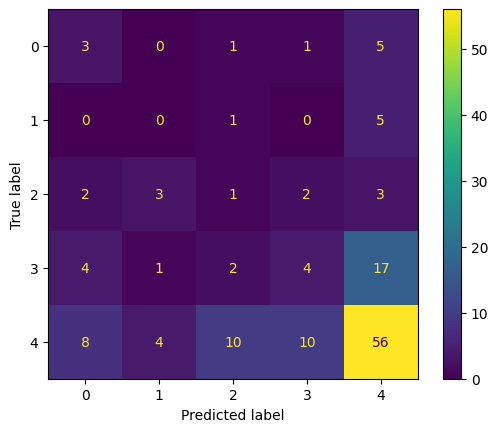

In [ ]:
# create confusion matrix
print("\nModel Accuracy:", accuracyRLT)

confusionmatrixRLT = metrics.confusion_matrix(y_test, y_pred)
displayRLT = metrics.ConfusionMatrixDisplay(confusion_matrix=confusionmatrixRLT).plot()
f1_score1 = metrics.f1_score(y_test, y_pred, average='weighted')  # 'weighted' accounts for label imbalance
print(f"F1 Score: {f1_score1}")

<div align="center"><b>D. Repeat tasks 5a-c with SVD to extract 8 components and build a predictive model.
Call it Model-2. Report the confusion matrix of Model-2.</b></div>

In [ ]:
# svd model2 for review/score
tfidfRLT2 = models.TfidfModel(DFMRLT)
DFM_tfidfRLT2 = tfidfRLT2[DFMRLT]
n_SVDRLT2 = 8 
SVD_modelRLT2 = models.LsiModel(DFM_tfidfRLT2, id2word=dictionaryRLT, num_topics=n_SVDRLT2)
SVDRLT2 = SVD_modelRLT2[DFM_tfidfRLT2]
svd_arrayRLT2 = gensim.matutils.corpus2csc(SVDRLT2).T.toarray()
svd_dfRLT2 = pd.DataFrame(svd_arrayRLT2)
svd_dfRLT2

/home/hexuser/.cache/pypoetry/virtualenvs/python-kernel-OtKFaj5M-py3.10/lib/python3.10/site-packages/gensim/models/lsimodel.py:963: DeprecationWarning: Please use `csc_matvecs` from the `scipy.sparse` namespace, the `scipy.sparse.sparsetools` namespace is deprecated.
  sparsetools.csc_matvecs(


,0,1,2,3,4,5,6,7
0,0.060834,-0.019635,-0.037944,0.022674,-0.063226,0.006963,-0.034936,-0.032266
1,0.171719,0.046432,0.004838,0.024694,-0.011015,0.053240,-0.003063,-0.008000
2,0.097506,0.134769,-0.013257,0.064036,0.041291,0.016735,-0.003326,0.006750
3,0.169545,0.015101,0.094558,0.007587,0.031766,0.033311,-0.000121,-0.051909
4,0.332877,0.031393,-0.037525,0.106201,0.026912,0.062017,-0.007969,-0.032437
...,...,...,...,...,...,...,...,...
710,0.165328,0.203696,-0.088508,-0.021305,-0.003447,-0.003120,0.122687,-0.032956
711,0.156768,-0.109603,0.018233,0.022334,-0.027538,0.013961,0.022903,-0.004087
712,0.144528,-0.044980,0.078034,0.032729,0.007762,0.024741,-0.015523,-0.016157
713,0.116998,-0.062439,0.058472,-0.105293,0.076055,0.025339,0.099965,0.063205


In [ ]:
# create a decision tree
# split data into X y
X2 = svd_dfRLT2[[0, 1, 2, 3, 4, 5, 6, 7]]
y2 = dfRL["review/score"]

# split data into training and test sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X2, y2, test_size=0.2, random_state=42
)

# initialize the dt classifier
model2RLT = DecisionTreeClassifier()

# fit model1 to training data
model2RLT.fit(X_train2, y_train2)

# predict on test set
y_pred2 = model2RLT.predict(X_test2)

# accuracy of model1
accuracyRLT2 = accuracy_score(y_test2, y_pred2)

# print accuracy
print(accuracyRLT2)

0.4755244755244755



Model Accuracy: 0.4755244755244755
F1 Score: 0.476023976023976


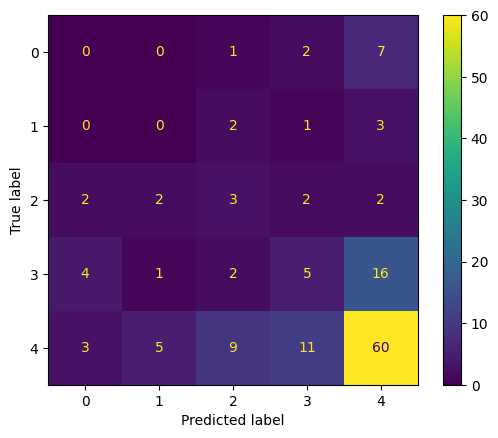

In [ ]:
# create confusion matrix
print("\nModel Accuracy:", accuracyRLT2)

confusionmatrixRLT2 = metrics.confusion_matrix(y_test2, y_pred2)
displayRLT2 = metrics.ConfusionMatrixDisplay(confusion_matrix=confusionmatrixRLT2).plot()
# f1 score 
f1_score2 = metrics.f1_score(y_test2, y_pred2, average='weighted')  # 'weighted' accounts for label imbalance
print(f"F1 Score: {f1_score2}")